In [1]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

c:\users\gpratyush\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted = gnb.predict(X_test)
expected = y_test

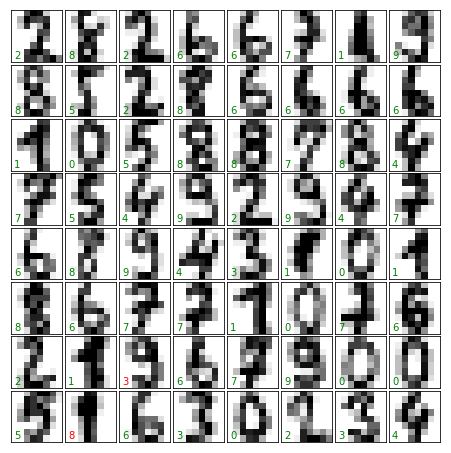

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    if(predicted[i] == expected[i]):
        ax.text(0, 7, str(predicted[i]), color = 'green')
    else:
        ax.text(0, 7, str(predicted[i]), color = 'red')

In [5]:
from sklearn.metrics import classification_report
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.70      0.91      0.79        43
          2       0.95      0.45      0.62        44
          3       0.83      0.87      0.85        45
          4       0.94      0.82      0.87        38
          5       0.98      0.90      0.93        48
          6       1.00      0.98      0.99        52
          7       0.76      0.98      0.85        48
          8       0.55      0.79      0.65        48
          9       1.00      0.64      0.78        47

avg / total       0.87      0.83      0.83       450



In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(expected, predicted))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]
